In [13]:
import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [14]:
filename = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_046d2199N_119d0837W_LST.json'

In [15]:
df = gp.read_file(filename)
df.head()

,parameter,geometry
0,"{'ALLSKY_KT': {'198401': 0.48, '198402': 0.46,...",POINT Z (-119.08370 46.21990 311.81000)


In [12]:
df['parameter'][0]

{'ALLSKY_KT': {'198401': 0.48,
  '198402': 0.46,
  '198403': 0.53,
  '198404': 0.55,
  '198405': 0.55,
  '198406': 0.58,
  '198407': 0.65,
  '198408': 0.62,
  '198409': 0.58,
  '198410': 0.53,
  '198411': 0.43,
  '198412': 0.47,
  '198413': 0.56,
  '198501': 0.59,
  '198502': 0.52,
  '198503': 0.62,
  '198504': 0.62,
  '198505': 0.65,
  '198506': 0.64,
  '198507': 0.65,
  '198508': 0.62,
  '198509': 0.55,
  '198510': 0.5,
  '198511': 0.45,
  '198512': 0.55,
  '198513': 0.6,
  '198601': 0.47,
  '198602': 0.48,
  '198603': 0.55,
  '198604': 0.6,
  '198605': 0.59,
  '198606': 0.64,
  '198607': 0.6,
  '198608': 0.65,
  '198609': 0.56,
  '198610': 0.61,
  '198611': 0.41,
  '198612': 0.44,
  '198613': 0.58,
  '198701': 0.5,
  '198702': 0.55,
  '198703': 0.59,
  '198704': 0.62,
  '198705': 0.61,
  '198706': 0.63,
  '198707': 0.59,
  '198708': 0.65,
  '198709': 0.66,
  '198710': 0.61,
  '198711': 0.48,
  '198712': 0.48,
  '198713': 0.6,
  '198801': 0.48,
  '198802': 0.6,
  '198803': 0.56,
  '1

In [5]:
type(df['parameter'][0])

dict

In [17]:
Idict = df['parameter'][0]

## Parameters
* `ALLSKY_KT`: All Sky Insolation Clearness Index, the all sky insolation that is transmitted through the atmosphere to strike the surface of the earth divided by the average of top of the atmosphere total solar irradiance incident (dimensionless)
* `CLOUD_AMT`: Cloud Amount, the average percent of cloud amount during the temporal period
* `CLRSKY_KT`: Clear Sky Insolation Clearness Index, the clear sky insolation that is transmitted through the atmosphere to strike the surface of the earth divided by the average of top of the atmosphere total solar irradiance incident (dimensionless)
* `TOA_SW_DWN`: Top-Of-Atmosphere Shortwave Direct Normal Radiation, the total solar irradiance incident (direct plus diffuse) on a horizontal plane at the top of the atmosphere (kW-hr/m^2/day)
* `ALLSKY_SFC_UVA`: All Sky Surface UVA Irradiance, the ultraviolet A (UVA 315nm-400nm) irradiance under all sky conditions (W/m^2)
* `ALLSKY_SFC_UVB`: All Sky Surface UVB Irradiance, the ultraviolet B (UVB 280nm-315nm) irradiance under all sky conditions (W/m^2)
* `ALLSKY_SRF_ALB`: All Sky Surface Albedo, the ratio of the solar energy reflected by the surface of the earth compared to the total solar energy incident reaching the surface of the earth (dimensionless)
* `ALLSKY_SFC_SW_DNI`: All Sky Surface Shortwave Downward Direct Normal Irradiance, the direct solar irradiance incident to a horizontal plane normal (perpendicular) to the direction of the sun's position under all sky conditions (kW-hr/m^2/day)
* `ALLSKY_SFC_SW_DWN`: All Sky Surface Shortwave Downward Irradiance, the total solar irradiance incident (direct plus diffuse) on a horizontal plane at the surface of the earth under all sky conditions (kW-hr/m^2/day)
* `CLRSKY_SFC_SW_DWN`: Clear Sky Surface Shortwave Downward Irradiance, the total solar irradiance incident (direct plus diffuse) on a horizontal plane at the surface of the earth under clear sky conditions (kW-hr/m^2/day)
* `ALLSKY_SFC_PAR_TOT`: All Sky Surface PAR Total, total Photosynthetically Active Radiation (PAR) incident on a horizontal plane at the surface of the earth under all sky conditions (W/m^2)
* `ALLSKY_SFC_SW_DIFF`: All Sky Surface Shortwave Diffuse Irradiance, the diffuse (light energy scattered out of the direction of the sun) solar irradiance incident on a horizontal plane at the surface of the earth under all sky conditions. (kW-hr/m^2/day)
* `CLRSKY_SFC_PAR_TOT`: Clear Sky Surface PAR Total, total Photosynthetically Active Radiation (PAR) incident on a horizontal plane at the surface of the earth under clear sky conditions (W/m^2)
* `ALLSKY_SFC_UV_INDEX`: All Sky Surface UV Index, the ultraviolet radiation exposure index (dimensionless), doesn't seem to have any values 

In [18]:
Idf =  pd.DataFrame.from_dict(Idict)
Idf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.48,67.89,0.70,3.13,-999.00,-999.00,0.29,-999.00,1.49,2.18,-999.00,-999.00,-999.00,-999
198402,0.46,70.16,0.72,4.68,-999.00,-999.00,0.24,-999.00,2.16,3.35,-999.00,-999.00,-999.00,-999
198403,0.53,66.52,0.74,6.90,-999.00,-999.00,0.21,-999.00,3.68,5.14,-999.00,-999.00,-999.00,-999
198404,0.55,67.84,0.76,9.15,-999.00,-999.00,0.15,-999.00,5.07,6.92,-999.00,-999.00,-999.00,-999
198405,0.55,69.68,0.74,10.82,-999.00,-999.00,0.19,-999.00,6.04,8.00,-999.00,-999.00,-999.00,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202009,0.57,42.00,0.63,7.58,9.58,0.20,0.17,5.65,4.32,4.81,78.59,1.37,87.06,-999
202010,0.59,51.23,0.70,5.32,6.95,0.12,0.18,4.88,3.13,3.68,56.94,1.10,67.59,-999
202011,0.48,61.96,0.68,3.50,3.64,0.04,0.17,2.96,1.67,2.38,29.96,0.76,42.98,-999
202012,0.38,68.55,0.66,2.71,2.26,0.02,0.17,2.02,1.02,1.80,18.22,0.51,31.94,-999


In [20]:
Prophetdf = pd.DataFrame(Idf['ALLSKY_KT'])
type(Prophetdf)
Prophetdf

,ALLSKY_KT
198401,0.48
198402,0.46
198403,0.53
198404,0.55
198405,0.55
...,...
202009,0.57
202010,0.59
202011,0.48
202012,0.38


In [21]:
Prophetdf['ALLSKY_KT'][0]

0.48

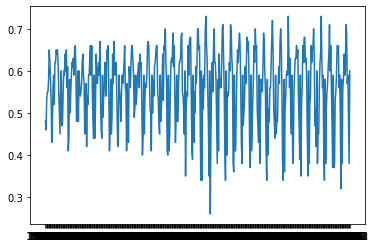

In [22]:
plt.plot(Prophetdf['ALLSKY_KT'][:])

In [11]:
Prophetdf.index[12::13]

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')

In [23]:
Prophetdf=Prophetdf.rename(columns={"ALLSKY_KT": "y"})


def append(dfseries):
    dfseries = dfseries[:4] + '/' + dfseries[4:]
    return dfseries
print(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf = Prophetdf.drop(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf['ds']=Prophetdf.index
Prophetdf['ds']= Prophetdf['ds'].astype(str)

Prophetdf['ds'] = Prophetdf['ds'].apply(append)
#a_string = a_string[:1] + "b" + a_string[1:]
Prophetdf

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')
(481, 1)
(444, 1)


,y,ds
198401,0.48,1984/01
198402,0.46,1984/02
198403,0.53,1984/03
198404,0.55,1984/04
198405,0.55,1984/05
...,...,...
202008,0.69,2020/08
202009,0.57,2020/09
202010,0.59,2020/10
202011,0.48,2020/11


In [13]:
Prophetdf['ds'][26]

'1986/03'

In [14]:
m = Prophet(weekly_seasonality=False,daily_seasonality=True)
m.fit(Prophetdf)

Initial log joint probability = -12.4192


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1032.84    0.00106165       77.3286      0.7306      0.7306      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       1033.52   1.04702e-06       101.762   1.478e-08       0.001      260  LS failed, Hessian reset 
     184       1033.52   2.41266e-08       63.3848      0.2457           1      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [15]:
futuredays=365*20
future = m.make_future_dataframe(periods=futuredays)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7739,2040-11-22,0.383724,0.328931,0.438620
7740,2040-11-23,0.381527,0.326502,0.435750
7741,2040-11-24,0.380401,0.328737,0.439666
7742,2040-11-25,0.380323,0.323787,0.438109
7743,2040-11-26,0.381238,0.327730,0.434679


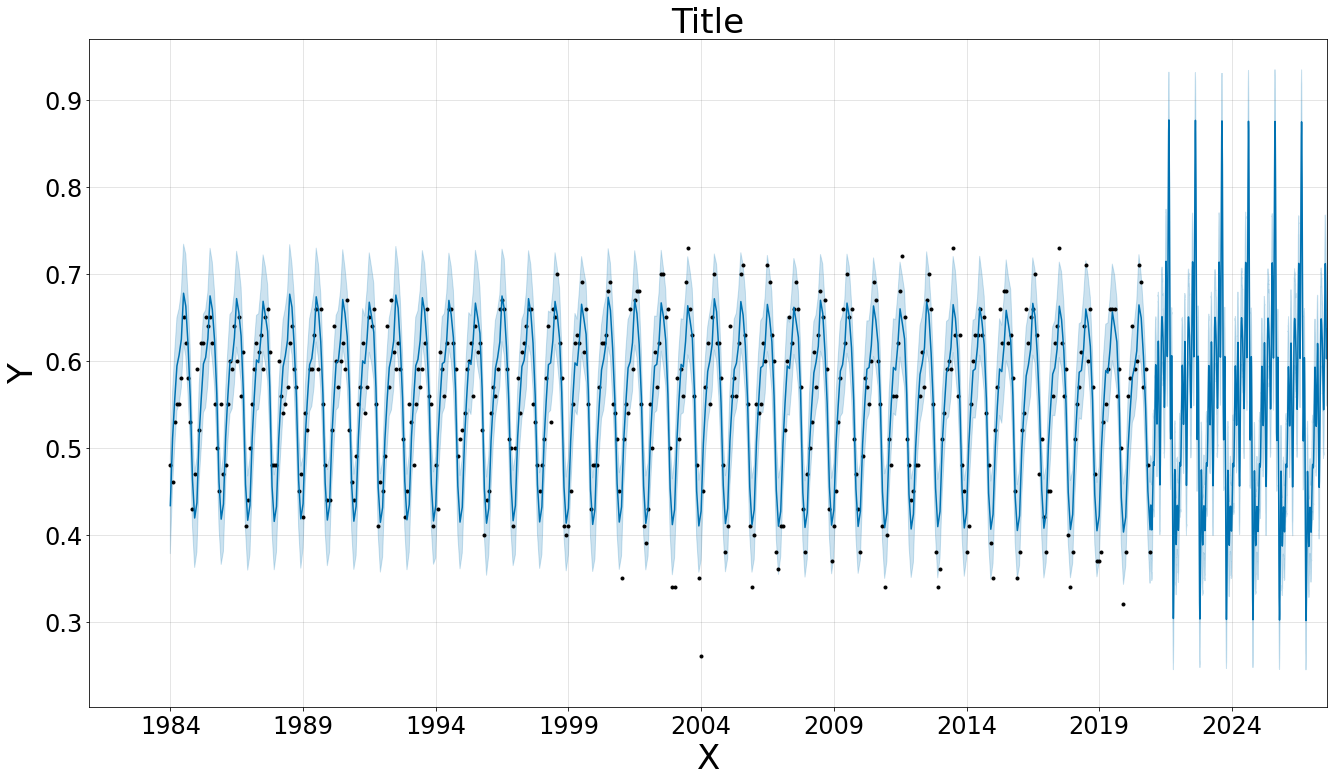

In [16]:

fig1 = m.plot(forecast,figsize=(18,10 ))
#figsize=(18,10)
ax = fig1.gca()
ax.set_title("Title", size=34)
ax.set_xlabel("X", size=34)
ax.set_ylabel("Y", size=34)
x2=16801
x1=4000

x3=21030
x4=26000
ax.set_xlim([x1,x3])
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

In [24]:
#model = ARIMA(Prophetdf['y'],exog =Prophetdf['ds'], order=(5,1,0))
model = ARIMA(Prophetdf['y'].values, order=(1,1,0),seasonal_order=(1,2,1,12))
#SARIMA(3,1,0)(1,1,0)12
model_fit = model.fit()
#cfg_list = sarima_configs(seasonal=[0,6,12])

In [25]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  444
Model:             ARIMA(1, 1, 0)x(1, 2, [1], 12)   Log Likelihood                 557.800
Date:                            Sat, 05 Mar 2022   AIC                          -1107.600
Time:                                    15:29:06   BIC                          -1091.449
Sample:                                         0   HQIC                         -1101.216
                                            - 444                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4291      0.048     -9.022      0.000      -0.522      -0.336
ar.S.L12      -0.5086      0.043   

In [28]:
pred_sol = model_fit.predict(start = 0, end = 600)

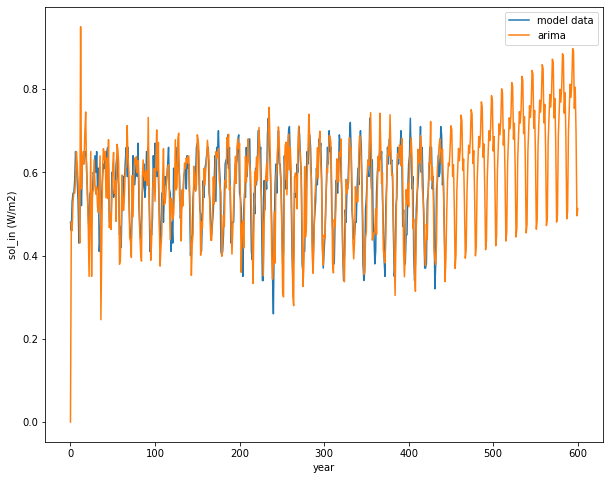

In [29]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(Prophetdf['y'].values,label = 'model data')
ax.plot(pred_sol, label = 'arima')
ax.set_xlabel('year')
ax.set_ylabel('sol_in (W/m2)')
#ax.set_xlim([400,500])
ax.legend()

/home/elasive/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


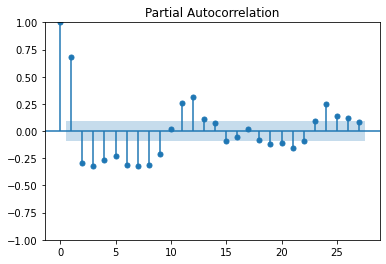

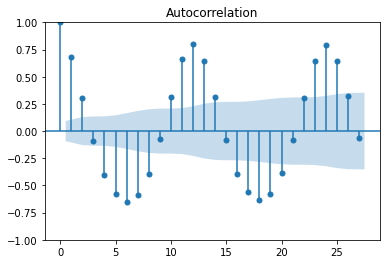

In [23]:
plot_pacf(Prophetdf['y']);
plot_acf(Prophetdf['y']);

In [25]:
ad_fuller_result = adfuller(Prophetdf['y'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.416560044974137
p-value: 3.1262289348109963e-06


In [26]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))